# Sports Betting Using Handicapper Data

Submitted by:
* Ji Zheng
* Ye (Kevin) Pang
* Jay Zuniga

Date: April 18, 2018

Web data scrapped from https://www.sportschatexperts.com/index/cappers/

## Contents <a name='top' />

* <a href='#background'>Background</a>
* <a href='#data'>Data Preparation</a>
* <a href='#eda'>Exploratory Analysis</a>
* <a href='#knn'>k-Nearest Neighbors (kNN)</a>
* <a href='#nb'>Naive Bayes (NB)</a>
* <a href='#lr'>Logistic Regression (LR)</a>
* <a href='#rf'>Random Forest (RF)</a>
* <a href='#gbm'>Gradient Boosting Machine (GBM)</a>
* <a href='#svm'>Support Vector Machines (SVM)</a>
* <a href='#kmeans'>K-means Clustering</a>
* <a href='#gmm'>Gaussian Mixture Model (GMM)</a>
* <a href='#ensemble'>Multilayer Perceptron</a>
* <a href='#results'>Ensemble</a>
* <a href='#appendix_a'>Appendix A</a>
* <a href='#appendix_b'>Appendix B</a>

Time permitting, we wanted to explore classifiers that we covered in the course. These are:

**Supervised**:    
- k Nearest Neighbors
- Naive Bayes
- Logistic Regression
- Random Forest
- Gradient Boosting Machines
- Support Vector Machines

**Unsupervised**:
- K-means
- Gaussian Mixture Model

**Deep learning**:
- Multilayer perceptron

## Background <a name='background' />

<a href='#top'>[Back to Contents]</a>

Sports Betting has become a very big market in the USA, with the legal side estimated at over 4 Billion USD and the total market estimated at 150 Billion USD. As a response to this market, handicappers have started offering their predictions, usually for a fee. Handicappers offer their predictions on specific games.

Our team aims to use ML to:
* Identify (if any) handicappers that are most accurate for a given game (league, team)
* Use the handicapper’s data to predict the outcome of the game for automated money-line betting

## Data Preparation <a name='data' />

<a href='#top'>[Back to Contents]</a>

#### Import packages

In [8]:
import requests, bs4, hashlib, collections 
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Web scrapping (No need to run this step since we have saved the datasets)

In [10]:
# # Web scrapping 
# # Try an example on MIT SIMULATOR, https://www.sportschatexperts.com/index/capperhistory/capper_id/68/
# def get_html(url):
#     html = requests.get(url)
#     try:
#         html.raise_for_status()
#     except Exception as exc:
#         print('There was a problem: %s' % exc)
#     html = bs4.BeautifulSoup(html.text, "html5lib")
#     return html

# def get_next_url(html):
#     # find the next button
#     return html.find('a', string='Next')['href']

# def merge_table(url, stop_page=-1, data=[]):
#     cur_page = 0
#     while True:
#         cur_page += 1
#         if cur_page % 50 == 0:
#             print("\tProcess %s ..." % url)
#         html = get_html(url)
#         table = html.find('section', class_='leaderboards diffpadding').div.table
#         table_body = table.find('tbody')       
#         rows = table_body.find_all('tr', class_='leaderboards_row2 fix-border-bottom ph-first-row')
#         for row in rows:
#             cols = row.find_all('td')
#             # make sure the targeted row for extraction has 10 columns
#             if len(cols) == 10:
#                 # only want to keep these columns
#                 keep_columns = [1, 2, 3, 4, 5, 6, 7, 8]
#                 cols = [ele.text.strip() for ele in [cols[i] for i in keep_columns]]
#                 data.append([ele for ele in cols if ele]) # Get rid of empty values
#         url = get_next_url(html)
#         if (url == '#') or cur_page >= stop_page:
#             break
            
# def crawl_history():
#     names = [
#     'Smart',
#     'Bartley',
#     'Aronson',
#     'Burns',
#     'Barone', # not in Ji's original list
#     'Bitler',
#     'Power',
#     'Ross',
#     'Diamond',
#     'Trapp',
#     'Sports',
#     'Eddie',
#     'Schule',
#     'DAmico',
#     'Duffy',
#     'Thomas',
#     'Hunter',
#     'Compeau', # not in Ji's original list
#     'Syndicate',
#     'Lundin',
#     'Simulator',
#     'Wilson',
#     'Monohan',
#     'Vinceletti',
#     'Rickenbach',
#     'Higgs',
#     'Nover',
#     'Brown',
#     'Karpinski',
#     'Rogers'
#     ]

#     links = [
#     "https://www.sportschatexperts.com/index/capperhistory/capper_id/44/", 
#     "https://www.sportschatexperts.com/index/capperhistory/capper_id/33/",
#     "https://www.sportschatexperts.com/index/capperhistory/capper_id/50/",
#     "https://www.sportschatexperts.com/index/capperhistory/capper_id/67/",
#     "https://www.sportschatexperts.com/index/capperhistory/capper_id/69/",
#     "https://www.sportschatexperts.com/index/capperhistory/capper_id/65/",
#     "https://www.sportschatexperts.com/index/capperhistory/capper_id/62/",
#     "https://www.sportschatexperts.com/index/capperhistory/capper_id/66/",
#     "https://www.sportschatexperts.com/index/capperhistory/capper_id/36/",
#     "https://www.sportschatexperts.com/index/capperhistory/capper_id/29/",
#     "https://www.sportschatexperts.com/index/capperhistory/capper_id/45/", 
#     "https://www.sportschatexperts.com/index/capperhistory/capper_id/38/",
#     "https://www.sportschatexperts.com/index/capperhistory/capper_id/52/",
#     "https://www.sportschatexperts.com/index/capperhistory/capper_id/35/",
#     "https://www.sportschatexperts.com/index/capperhistory/capper_id/37/",
#     "https://www.sportschatexperts.com/index/capperhistory/capper_id/53/",
#     "https://www.sportschatexperts.com/index/capperhistory/capper_id/41/",
#     "https://www.sportschatexperts.com/index/capperhistory/capper_id/56/",
#     "https://www.sportschatexperts.com/index/capperhistory/capper_id/58/",
#     "https://www.sportschatexperts.com/index/capperhistory/capper_id/61/",
#     "https://www.sportschatexperts.com/index/capperhistory/capper_id/68/", 
#     "https://www.sportschatexperts.com/index/capperhistory/capper_id/30/",
#     "https://www.sportschatexperts.com/index/capperhistory/capper_id/43/",
#     "https://www.sportschatexperts.com/index/capperhistory/capper_id/46/",
#     "https://www.sportschatexperts.com/index/capperhistory/capper_id/57/",
#     "https://www.sportschatexperts.com/index/capperhistory/capper_id/40/",
#     "https://www.sportschatexperts.com/index/capperhistory/capper_id/51/",
#     "https://www.sportschatexperts.com/index/capperhistory/capper_id/42/",
#     "https://www.sportschatexperts.com/index/capperhistory/capper_id/60/",
#     "https://www.sportschatexperts.com/index/capperhistory/capper_id/55/",
#     ]
    
#     handicappers_dict = collections.OrderedDict(zip(names, links))
    
#     for k, v in handicappers_dict.items():
#         data=[]
#         merge_table(v, 9999, data)
#         #print(data)
#         df = pd.DataFrame(data, columns=['League', 'Game', 'Date', 'Play', 'Line Selected', 'Type', 'Score', 'Result'])
#         filename = 'HC' + str(list(handicappers_dict.keys()).index(k)+1)
        
#         # produce a hashed gamekey for the game
#         df["GameKey"] = df[['League', 'Game', 'Date']].apply(lambda x: hashlib.md5(''.join(x).encode('utf-8')).hexdigest(), axis=1)

#         # home team is always on the right?
#         df["Home"] = df["Game"].apply(lambda x: x.split('vs.')[1].strip().upper())

#         # away team is always on the left?
#         df["Away"] = df["Game"].apply(lambda x: x.split('vs.')[0].strip().upper())

#         # strip out type of bet
#         df["Bet"] = df["Line Selected"].apply(lambda x: x.split(':')[0].strip().upper())

#         # strip out which team the bet is on
#         df["On"] = df["Play"].apply(lambda x: x.split('Play on ')[1].strip().upper())

#         # convert game time to datetime format 
#         df["GameTime"] = df["Date"].apply(lambda x: pd.to_datetime(x))

#         # strip out juice
#         df["Juice"] = df["Line Selected"].apply(lambda x: x.split(': ')[1].strip() if ("Money Line" in x) else (x.split(': ')[1].split('/')[0].strip() if ("Total" in x) else x.split(': ')[1].split('/')[1].strip()))

#         # MLWinner: either home or away team for ML bets
#         conditions = [
#         (df['On'] == df['Home']) & (df['Bet'] == 'MONEY LINE') & (df['Result'] == 'Win'), 
#         (df['On'] == df['Away']) & (df['Bet'] == 'MONEY LINE') & (df['Result'] == 'Win'), 
#         (df['On'] == df['Home']) & (df['Bet'] == 'MONEY LINE') & (df['Result'] == 'Loss'), 
#         (df['On'] == df['Away']) & (df['Bet'] == 'MONEY LINE') & (df['Result'] == 'Loss')
#         ]
#         choices = ['Home', 'Away', 'Away', 'Home']
#         df['MLWinner'] = np.select(conditions, choices, default='')

#         # MLBet: either home or away team for ML bets
#         conditions = [
#         (df['On'] == df['Home']) & (df['Bet'] == 'MONEY LINE'), 
#         (df['On'] == df['Away']) & (df['Bet'] == 'MONEY LINE')
#         ]
#         choices = ['Home', 'Away']
#         df['MLBet'] = np.select(conditions, choices, default='')
        
#         columns_to_keep = ['League', 'GameKey', 'GameTime', 
#                    'Home', 'Away',
#                    'Bet', 'On',
#                    'Juice', 'Type', 'Result',
#                    'MLBet', 'MLWinner']
#         #print(df[columns_to_keep].head())
#         df[columns_to_keep].to_pickle(k + '.gz', compression="gzip")       

# crawl_history()

#### Concatenate and load all 30 handicappers' betting histories into one dataframe

In [3]:
# merge hadicappers' history bets into one dataframe
names = [
    'Smart',
    'Bartley',
    'Aronson',
    'Burns',
    'Barone', # not in Ji's original list
    'Bitler',
    'Power',
    'Ross',
    'Diamond',
    'Trapp',
    'Sports',
    'Eddie',
    'Schule',
    'DAmico',
    'Duffy',
    'Thomas',
    'Hunter',
    'Compeau', # not in Ji's original list
    'Syndicate',
    'Lundin',
    'Simulator',
    'Wilson',
    'Monohan',
    'Vinceletti',
    'Rickenbach',
    'Higgs',
    'Nover',
    'Brown',
    'Karpinski',
    'Rogers'
    ]

df = pd.DataFrame()
for i in range(1,31): 
    newdf = pd.read_pickle('HC' + str(i) + '.gz', compression='gzip')
    
    # if you want the last name of the HC, switch to use names array
    #newdf['Handicapper'] = names[i-1]
    newdf['Handicapper'] = 'HC'+str(i)
    df = df.append(newdf, ignore_index=True)

#### The following functions derive additonal handicapper attributes from the historical bets

 * number of wins in the past 30 games
 * percentage of wins in the past 30 games; for the 1st game, assume win % is 50%
 * active winning & losing streak counts 
 * number of wins in the past 30 games for specific sport(league)
 * percentage of wins in the past 30 games for specific sport(league); for the 1st game, assume win % is 50%
 * active winning & losing streak counts for specific sport(league)
 * risk appetite from betting 'juice' (odds)
   * if juice more than 120, then betting on 'underdog'
   * if juice less than -140, then betting on 'favorite'
   * consider everything else as betting on 'normal'
 * number of wins in the past 30 games for specific risk appetite
 * percentage of wins in the past 30 games for specific risk appetite

In [4]:
# add column for # of wins in the past 30 games
# add column for % of wins in the past 30 games
# if game is 0, assume win % is 50%
# add column for winning steak
def win_past_30_all_sport(df):
    df=df.sort_values(['Handicapper','GameTime'], ascending=[1,1])
    df=df.reset_index(drop=True)
    win_past_30=[]
    win_past_30_all_sport_percent=[]
    win_tracker=[]
    win_steak=[]
    win=0
    lose=0
    win_steak=[]
    
    pointer=0
    last=df.League.count()
    HC=df['Handicapper'][0]
    while pointer < last:
        if df['Handicapper'][pointer]!=HC:
            HC=df['Handicapper'][pointer]
            win_past_30.append(0)
            win_past_30_all_sport_percent.append(0.5)
            win_steak.append(0)
        elif pointer == 0:
            win_past_30.append(0)
            win_past_30_all_sport_percent.append(0.5)
            win_steak.append(0)
        else: 
            win_past_30.append(sum(win_tracker))
            mean = sum(win_tracker)/len(win_tracker)
            win_past_30_all_sport_percent.append(mean)
            if (win>lose):
                win_steak.append(win)
            else:
                win_steak.append(-lose)

        
        if df['Result'][pointer]=='Win':
            win_tracker.insert(0,1)
            win+=1
            lose=0
        elif df['Result'][pointer]=='Push':
            win_tracker.insert(0,1)
        else:
            win_tracker.insert(0,0)
            win=0
            lose+=1
            
            
        
        if len(win_tracker)>30:
            win_tracker.pop()
        pointer+=1

    df['win_past_30_all_sport']=win_past_30
    df['win_past_30_all_sport_percent']=win_past_30_all_sport_percent
    df['win_steak_all_sport']=win_steak
    return df
    
# add column for # of wins in the past 30 games for specific sport(league)
# add column for % of wins in the past 30 games for specific sport(league)
# if game is 0, assume win % is 50%
# add column for winning steak for specific sport(league) 
def win_past_30_specific_sport(df):
    df=df.sort_values(['Handicapper','League','GameTime'], ascending=[1,1,1])
    df=df.reset_index(drop=True)
    win_past_30=[]
    win_past_30_specific_sport_percent=[]
    win_tracker=[]
    pointer=0
    win_steak=[]
    win=0
    lose=0
    last=df.League.count()
    HC=df['Handicapper'][0]
    League=df['League'][0]
    while pointer < last:
        if (df['Handicapper'][pointer]!=HC) or (df['League'][pointer]!=League):
            HC=df['Handicapper'][pointer]
            League=df['League'][pointer]
            win_tracker=[]
            win_past_30.append(0)
            win_past_30_specific_sport_percent.append(0.5)
            win_steak.append(0)
        elif pointer == 0:
            win_past_30.append(0)
            win_past_30_specific_sport_percent.append(0.5)
            win_steak.append(0)
        else: 
            win_past_30.append(sum(win_tracker))
            mean = sum(win_tracker)/len(win_tracker)
            win_past_30_specific_sport_percent.append(mean)
            if (win>lose):
                win_steak.append(win)
            else:
                win_steak.append(-lose)
            
            
        if df['Result'][pointer]=='Win':
            win_tracker.insert(0,1)
            win+=1
            lose=0
        elif df['Result'][pointer]=='Push':
            win_tracker.insert(0,1)
        else:
            win_tracker.insert(0,0)
            win=0
            lose+=1
            
            
        if len(win_tracker)>30:
            win_tracker.pop()

        pointer+=1
    df['win_past_30_specific_sport']=win_past_30
    df['win_past_30_specific_sport_percent']=win_past_30_specific_sport_percent
    df['win_steak_specific_sport']=win_steak
    return df


## convert juice to risk level
## if juice more than 120, then we are betting on underdog
## if juice less than -140, then we are betting on favorite
## I consider everything else is 'normal'
def bet_risk(df):
    pointer=0
    bet_risk=[]
    last=df.League.count()
    while pointer < last:
        if int(df['Juice'][pointer])>120:
            bet_risk.append('underdog')
        elif int(df['Juice'][pointer])<-140:
            bet_risk.append('favorite')
        else:
            bet_risk.append('normal')
        pointer+=1
    df['bet_risk']=bet_risk
    return df

# add column for # of wins in the past 30 games for specific risk
# add column for % of wins in the past 30 games for specific risk
# if game is 0, assume win % is 50%
# add column for winning steak for specific risk
def win_past_30_specific_risk(df):
    df=df.sort_values(['Handicapper','bet_risk','GameTime'], ascending=[1,1,1])
    df=df.reset_index(drop=True)
    win_past_30=[]
    win_past_30_specific_risk_percent=[]
    win_tracker=[]
    pointer=0
    last=df.League.count()
    HC=df['Handicapper'][0]
    Risk=df['bet_risk'][0]
    while pointer < last:
        if (df['Handicapper'][pointer]!=HC) or (df['bet_risk'][pointer]!=Risk):
            HC=df['Handicapper'][pointer]
            Risk=df['bet_risk'][pointer]
            win_tracker=[]
            win_past_30.append(0)
            win_past_30_specific_risk_percent.append(0.5)
        elif pointer == 0:
            win_past_30.append(0)
            win_past_30_specific_risk_percent.append(0.5)
        else: 
            win_past_30.append(sum(win_tracker))
            mean = sum(win_tracker)/len(win_tracker)
            win_past_30_specific_risk_percent.append(mean)
        if df['Result'][pointer]=='Win':
            win_tracker.insert(0,1)
        else:
            win_tracker.insert(0,0)
        if len(win_tracker)>30:
            win_tracker.pop()

        pointer+=1
    df['win_past_30_specific_risk']=win_past_30
    df['win_past_30_specific_risk_percent']=win_past_30_specific_risk_percent
    return df

df = win_past_30_all_sport(df)
df = win_past_30_specific_sport(df)
df = bet_risk(df)
df = win_past_30_specific_risk(df)

#### Here's our modeling dataset

In [12]:
print(df.shape)
print(df.columns)

(134880, 22)
Index(['League', 'GameKey', 'GameTime', 'Home', 'Away', 'Bet', 'On', 'Juice',
       'Type', 'Result', 'MLBet', 'MLWinner', 'Handicapper',
       'win_past_30_all_sport', 'win_past_30_all_sport_percent',
       'win_steak_all_sport', 'win_past_30_specific_sport',
       'win_past_30_specific_sport_percent', 'win_steak_specific_sport',
       'bet_risk', 'win_past_30_specific_risk',
       'win_past_30_specific_risk_percent'],
      dtype='object')


## Exploratory Analysis <a name='eda' />

<a href='#top'>[Back to Contents]</a>

In [24]:
# code

In [25]:
# summary of findings

## K-Nearest Neighbors <a name='knn' />

<a href='#top'>[Back to Contents]</a>

In [ ]:
# code

In [ ]:
# summary of findings

## Naive Bayes <a name='nb' />

<a href='#top'>[Back to Contents]</a>

In [40]:
from sklearn.naive_bayes import BernoulliNB
#from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [50]:
non_clf_ml_bets = df[(df['Bet']=='MONEY LINE') & (df['League']!='CLF') & (df['MLWinner'] !='')]

columns_to_exclude = ['GameKey', 'GameTime', 'Away', 'Home', 'Bet', 'On', 'Juice', 'Type', 'Result', 'MLWinner', 'Handicapper']

model_features = non_clf_ml_bets.columns.difference(columns_to_exclude)
print('Here are the modeling features:', model_features)

target = ['MLWinner']

Here are the modeling features: Index(['League', 'MLBet', 'bet_risk', 'win_past_30_all_sport',
       'win_past_30_all_sport_percent', 'win_past_30_specific_risk',
       'win_past_30_specific_risk_percent', 'win_past_30_specific_sport',
       'win_past_30_specific_sport_percent', 'win_steak_all_sport',
       'win_steak_specific_sport'],
      dtype='object')


In [51]:
make_dummies = ['League', 'MLBet', 'bet_risk']

binarized_non_clf_ml_bets = pd.get_dummies(non_clf_ml_bets, columns=make_dummies)
print(binarized_non_clf_ml_bets.shape)


features = binarized_non_clf_ml_bets.columns.difference(columns_to_exclude)

# Split into train and test data.
train_data = binarized_non_clf_ml_bets[(binarized_non_clf_ml_bets.GameTime < '2017-07-01')][features]
train_labels = binarized_non_clf_ml_bets[(binarized_non_clf_ml_bets.GameTime < '2017-07-01')][target]

test_data = binarized_non_clf_ml_bets[(binarized_non_clf_ml_bets.GameTime >= '2017-07-01')][features]
test_labels = binarized_non_clf_ml_bets[(binarized_non_clf_ml_bets.GameTime >= '2017-07-01')][target]

print(train_data.shape, test_data.shape)

(40484, 31)
(32383, 20) (8101, 20)


In [57]:
clf=BernoulliNB(alpha=0.01)
clf.fit(train_data,train_labels.values.ravel())

print('train: ', accuracy_score(clf.predict(train_data),train_labels))
print('test: ', accuracy_score(clf.predict(test_data),test_labels))

test_predicted_labels = clf.predict(test_data)
test_predicted_probs = clf.predict_proba(test_data)
print("\nConfusion matrix:\n%s" % confusion_matrix(test_labels, test_predicted_labels))
print("\nClassification report for classifier %s:\n%s\n"
% (clf, classification_report(test_labels, test_predicted_labels))) 

train:  0.528641571195
test:  0.532403406987

Confusion matrix:
[[1243 2548]
 [1240 3070]]

Classification report for classifier BernoulliNB(alpha=0.01, binarize=0.0, class_prior=None, fit_prior=True):
             precision    recall  f1-score   support

       Away       0.50      0.33      0.40      3791
       Home       0.55      0.71      0.62      4310

avg / total       0.52      0.53      0.51      8101




In [ ]:
# summary of findings

## Logistic Regression <a name='lr' />

<a href='#top'>[Back to Contents]</a>

In [26]:
# code

In [27]:
# summary of findings

## Random Forest <a name='rf' />

<a href='#top'>[Back to Contents]</a>

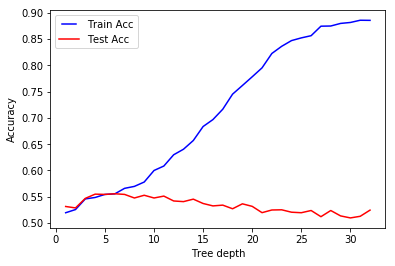

In [60]:
from sklearn.ensemble import RandomForestClassifier

non_clf_ml_bets = df[(df['Bet']=='MONEY LINE') & (df['League']!='CLF') & (df['MLWinner'] !='')]

columns_to_exclude = ['GameKey', 'GameTime', 'Away', 'Home', 'Bet', 'On', 'Juice', 'Type', 'Result', 'MLWinner', 'Handicapper']

model_features = non_clf_ml_bets.columns.difference(columns_to_exclude)
print('Here are the modeling features:', model_features)

target = ['MLWinner']

make_dummies = ['League', 'MLBet', 'bet_risk']

binarized_non_clf_ml_bets = pd.get_dummies(non_clf_ml_bets, columns=make_dummies)
print(binarized_non_clf_ml_bets.shape)


features = binarized_non_clf_ml_bets.columns.difference(columns_to_exclude)

# Split into train and test data.
train_data = binarized_non_clf_ml_bets[(binarized_non_clf_ml_bets.GameTime < '2017-07-01')][features]
train_labels = binarized_non_clf_ml_bets[(binarized_non_clf_ml_bets.GameTime < '2017-07-01')][target]

test_data = binarized_non_clf_ml_bets[(binarized_non_clf_ml_bets.GameTime >= '2017-07-01')][features]
test_labels = binarized_non_clf_ml_bets[(binarized_non_clf_ml_bets.GameTime >= '2017-07-01')][target]

print(train_data.shape, test_data.shape)

# let's try to find the optimal depth
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
    rf = RandomForestClassifier(max_depth=max_depth, n_jobs=-1)
    rf.fit(train_data, train_labels.values.ravel())
    train_pred = rf.predict(train_data)
    train_acc = accuracy_score(rf.predict(train_data),train_labels)
    train_results.append(train_acc)
    y_pred = rf.predict(test_data)
    test_acc = accuracy_score(rf.predict(test_data),test_labels)
    test_results.append(test_acc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label="Train Acc")
line2, = plt.plot(max_depths, test_results, 'r', label="Test Acc")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy')
plt.xlabel('Tree depth')
plt.show()

In [61]:
# Instantiate model with 30 decision trees
clf = RandomForestClassifier(n_estimators = 30, random_state = 42, max_depth = 4)

# Train the model on training data
clf.fit(train_data, train_labels.values.ravel())

print('train: ', accuracy_score(clf.predict(train_data),train_labels))
print('test: ', accuracy_score(clf.predict(test_data),test_labels))

test_predicted_labels = clf.predict(test_data)
test_predicted_probs = clf.predict_proba(test_data)
print("\nConfusion matrix:\n%s" % confusion_matrix(test_labels, test_predicted_labels))
print("\nClassification report for classifier %s:\n%s\n"
% (clf, classification_report(test_labels, test_predicted_labels))) 

train:  0.550412253343
test:  0.554252561412

Confusion matrix:
[[1575 2216]
 [1395 2915]]

Classification report for classifier RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False):
             precision    recall  f1-score   support

       Away       0.53      0.42      0.47      3791
       Home       0.57      0.68      0.62      4310

avg / total       0.55      0.55      0.55      8101




In [ ]:
# summary of findings

## Gradient Boosting Machine <a name='gbm' />

<a href='#top'>[Back to Contents]</a>

In [68]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier()
clf.fit(train_data, train_labels.values.ravel())

print('train: ', accuracy_score(clf.predict(train_data),train_labels))
print('test: ', accuracy_score(clf.predict(test_data),test_labels))

test_predicted_labels = clf.predict(test_data)
test_predicted_probs = clf.predict_proba(test_data)
print("\nConfusion matrix:\n%s" % confusion_matrix(test_labels, test_predicted_labels))
print("\nClassification report for classifier %s:\n%s\n"
% (clf, classification_report(test_labels, test_predicted_labels))) 

train:  0.559645493006
test:  0.548080483891

Confusion matrix:
[[1581 2210]
 [1451 2859]]

Classification report for classifier GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False):
             precision    recall  f1-score   support

       Away       0.52      0.42      0.46      3791
       Home       0.56      0.66      0.61      4310

avg / total       0.54      0.55      0.54      8101




In [21]:
# summary of findings

## Support Vector Machines <a name='svm' />

<a href='#top'>[Back to Contents]</a>

In [ ]:
# code

In [ ]:
# summary of findings

## K-means Clustering <a name='kmeans' />

<a href='#top'>[Back to Contents]</a>

In [22]:
# code

In [23]:
# add contents

## create more bookmarks as needed ...

In [28]:
# code

In [29]:
# add contents